## The Nobel of Prizes data broad view
<p><img style="float: right;margin:5px 20px 5px 1px; max-width:250px" src="https://raw.githubusercontent.com/Bayan2019/Big_Data_Landscape/main/Nobel_Prize.png"></p>
<p>Every year the Nobel Prize is given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. The first Nobel Prize was handed out in 1901.

## Getting sense of the Data

In [1]:
# Loading in required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

# Reading in the Nobel Prize data
nobel_df = pd.read_csv('https://raw.githubusercontent.com/Bayan2019/Big_Data_Landscape/main/archive.csv')

# Taking a look at the first several winners
nobel_df.head(3)

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany


In [2]:
nobel_df.shape

(969, 18)

In [3]:
nobel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Year                  969 non-null    int64 
 1   Category              969 non-null    object
 2   Prize                 969 non-null    object
 3   Motivation            881 non-null    object
 4   Prize Share           969 non-null    object
 5   Laureate ID           969 non-null    int64 
 6   Laureate Type         969 non-null    object
 7   Full Name             969 non-null    object
 8   Birth Date            940 non-null    object
 9   Birth City            941 non-null    object
 10  Birth Country         943 non-null    object
 11  Sex                   943 non-null    object
 12  Organization Name     722 non-null    object
 13  Organization City     716 non-null    object
 14  Organization Country  716 non-null    object
 15  Death Date            617 non-null    ob

In [4]:
nobel_df.isna().sum()

Year                      0
Category                  0
Prize                     0
Motivation               88
Prize Share               0
Laureate ID               0
Laureate Type             0
Full Name                 0
Birth Date               29
Birth City               28
Birth Country            26
Sex                      26
Organization Name       247
Organization City       253
Organization Country    253
Death Date              352
Death City              370
Death Country           364
dtype: int64

In [5]:
len(nobel_df['Category'].unique())

6

In [6]:
len(nobel_df['Birth Country'].unique())

122

## Who gets the Nobel Prize?

We see that all of the winners in 1901 were guys that came from Europe. But that was back in 1901, looking at all winners in the dataset, from 1901 to 2016, which sex and which country is the most commonly represented? 

In [30]:
# Display the number of (possibly shared) Nobel Prizes handed
# out between 1901 and 2016
display(len(nobel_df))
# Display the number of prizes won by male and female recipients.
display(nobel_df['Sex'].value_counts())
# Display the number of prizes won by the top 10 nationalities.
nobel_df['Birth Country'].value_counts().head(11)

969

Male      893
Female     50
Name: Sex, dtype: int64

United States of America    276
United Kingdom               88
Germany                      70
France                       53
Sweden                       30
Japan                        29
Russia                       20
Netherlands                  19
Canada                       18
Italy                        18
Switzerland                  17
Name: Birth Country, dtype: int64

In [31]:
birth_country = nobel_df.groupby('Birth Country')['Birth Country'].count().reset_index(name = 'count').sort_values(by='count', ascending = False)
fig = px.bar(birth_country[0:20], y='Birth Country', x = 'count', color = 'Birth Country')
fig.show()

## USA dominance
Not so surprising perhaps: the most common Nobel laureate between 1901 and 2016 was a man born in the United States of America. But in 1901 all the winners were European. When did the USA start to dominate the Nobel Prize charts?

In [3]:
# Calculating the proportion of USA born winners per decade
nobel_df['USA born winner'] = nobel_df['Birth Country'] == 'United States of America'
nobel_df['Decade'] = (np.floor(nobel_df.Year / 10) * 10).astype(int)
prop_usa_winners = nobel_df.groupby(by='Decade', as_index=False)['USA born winner'].mean()

prop_usa_winners_year = nobel_df.groupby(by='Year', as_index=False)['USA born winner'].mean()
# Display the proportions of USA born winners per decade
display(prop_usa_winners)

,Decade,USA born winner
0,1900,0.017241
1,1910,0.075000
2,1920,0.074074
3,1930,0.241935
4,1940,0.288889
5,1950,0.278481
6,1960,0.262500
7,1970,0.308411
8,1980,0.313131
9,1990,0.392523


A table is OK, but to see when the USA started to dominate the Nobel charts we need a plot!

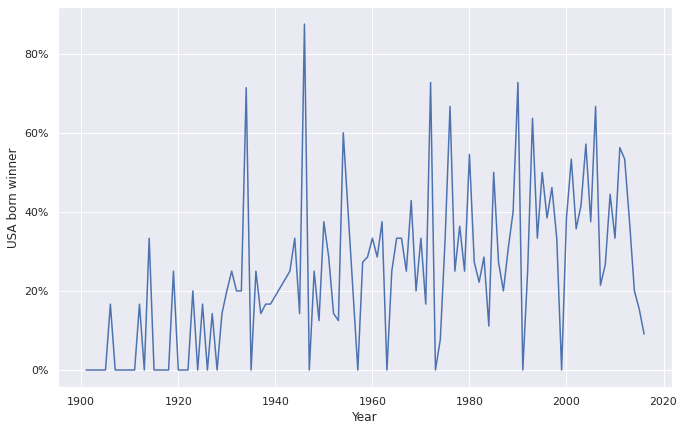

In [4]:
# Setting the plotting theme
sns.set()
# and setting the size of all plots.
plt.rcParams['figure.figsize'] = [11, 7]

# Plotting USA born winners 
ax = sns.lineplot(x='Year', y='USA born winner', data=prop_usa_winners_year)

# Adding %-formatting to the y-axis
from matplotlib.ticker import PercentFormatter
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

## Origin of Nobel Prize winners

In [5]:
birth_city = nobel_df.groupby('Birth City')['Birth City'].count().reset_index(name = 'count').sort_values(by='count', ascending = False)
fig = px.bar(birth_city[0:20], y='Birth City', x = 'count', color = 'Birth City')
fig.show()

In [6]:
birth_country = nobel_df.groupby('Birth Country')['Birth Country'].count().reset_index(name = 'count').sort_values(by='count', ascending = False)
fig = px.bar(birth_country[0:20], y='Birth Country', x = 'count', color = 'Birth Country')
fig.show()

## Where do Nobel Prize Winners die?

In [7]:
death_city = nobel_df.groupby('Death City')['Death City'].count().reset_index(name = 'count').sort_values(by='count', ascending = False)
fig = px.bar(death_city[0:20], y='Death City', x = 'count', color = 'Death City')
fig.show()

In [8]:
death_country = nobel_df.groupby('Death Country')['Death Country'].count().reset_index(name = 'count').sort_values(by='count', ascending = False)
fig = px.bar(death_country[0:20], y='Death Country', x = 'count', color = 'Death Country')
fig.show()

## Organizations

In [9]:
orgainization_names = nobel_df.groupby('Organization Name')['Organization Name'].count().reset_index(name = 'count').sort_values(by='count', ascending = False)
fig = px.bar(orgainization_names[0:25], y='Organization Name', x = 'count', color = 'Organization Name')
fig.show()

In [9]:
orgainization_country = nobel_df.groupby('Organization Country')['Organization Country'].count().reset_index(name = 'count').sort_values(by='count', ascending = False)
fig = px.bar(orgainization_country[0:20], y='Organization Country', x = 'count', color = 'Organization Country')
fig.show()

In [10]:
orgainization_city = nobel_df.groupby('Organization City')['Organization City'].count().reset_index(name = 'count').sort_values(by='count', ascending = False)
fig = px.bar(orgainization_city[0:20], y='Organization City', x = 'count', color = 'Organization City')
fig.show()

In [11]:
organizations = nobel_df['Organization Name'].dropna().unique()
len(organizations)

315

In [24]:
organization_names = nobel_df.groupby('Organization Name')['Organization Name'].count().reset_index(name = 'count').sort_values(by='count', ascending = False)
fig = px.bar(organization_names[0:16], y='Organization Name', x = 'count', color = 'Organization Name')
fig.show()

In [13]:
organization_names.set_index('Organization Name', inplace=True)

In [14]:
cat_org = nobel_df.groupby(['Organization Name', 'Category'])['Organization Name'].count().reset_index(name = 'count').sort_values(by='count', ascending = False)
cat_org['NumberPerOrganization']=0
for org in organizations:
  cat_org['NumberPerOrganization'] += (cat_org['Organization Name']==org)*organization_names.loc[org, 'count']

In [15]:
cat_org.sort_values(by=['NumberPerOrganization', 'Organization Name'], ascending=False, inplace=True) 

In [23]:
fig = px.bar(cat_org[:53], y = 'Organization Name',  x = 'count', color='Category').update_yaxes(categoryorder='total descending')
fig.show()

In [16]:
cat_org.head(15)

,Organization Name,Category,count,NumberPerOrganization
305,University of California,Chemistry,13,34
308,University of California,Physics,11,34
306,University of California,Economics,8,34
307,University of California,Medicine,2,34
101,Harvard University,Physics,8,27
97,Harvard University,Chemistry,6,27
98,Harvard University,Economics,6,27
99,Harvard University,Medicine,6,27
100,Harvard University,Peace,1,27
268,Stanford University,Physics,9,18


In [22]:
#cat_city = nobel_df.groupby(['Organizationn Name','Category'])['Category'].count().reset_index(name = 'count')
fig = px.bar(cat_org, x='count', y = 'Category', color = 'Organization Name')
fig.show()

## Distribution of number of Nobel Prizes during time

In [97]:
Year = nobel_df.groupby("Year")['Year'].count().reset_index(name = 'Count')
fig = px.bar(Year, x='Year', y='Count')
fig.show()

In [99]:
cat_year = nobel_df.groupby(['Year','Category'])['Category'].count().reset_index(name = 'count')
fig = px.bar(cat_year, x='Year', y = 'count', color = 'Category')
fig.show()

## What is the gender of a typical Nobel Prize winner?

In [108]:
gen_year = nobel_df.groupby(['Year','Sex', 'Category'])['Year'].count().reset_index(name = 'count')
fig = px.bar(gen_year, x='Year', y = 'count', color = 'Sex')
fig.show()

In [26]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [27]:
pie_df1960=nobel_df[nobel_df['Year']<=1960]['Sex'].value_counts().reset_index()
pie_df1960.columns=['sex', 'count']
pie_df1961_pr=nobel_df[nobel_df['Year']>1960]['Sex'].value_counts().reset_index()
pie_df1961_pr.columns=['sex', 'count']
fig = make_subplots(1, 2, specs=[[{'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=['1901-1960', '1960-2016'])
fig.add_trace(go.Pie(labels=['male', 'female'], values=pie_df1960['count'],
                     name='Starry Night'), 1, 1)
fig.add_trace(go.Pie(labels=['male', 'female'], values=pie_df1961_pr['count'],
                     name='Starry Night'), 1, 2)
#fig=px.pie(pie_df1960, values="count", names="sex", title="proportion of genders",color_discrete_sequence=['blue', 'red'])
fig.show()

In [28]:
nobel_df['Category'].unique()

array(['Chemistry', 'Literature', 'Medicine', 'Peace', 'Physics',
       'Economics'], dtype=object)

In [29]:
pie_df_chemistry =nobel_df[nobel_df['Category']=='Chemistry']['Sex'].value_counts().reset_index()
pie_df_literature = nobel_df[nobel_df['Category']=='Literature']['Sex'].value_counts().reset_index()
pie_df_medicine = nobel_df[nobel_df['Category']=='Medicine']['Sex'].value_counts().reset_index()
pie_df_peace = nobel_df[nobel_df['Category']=='Peace']['Sex'].value_counts().reset_index()
pie_df_physics = nobel_df[nobel_df['Category']=='Physics']['Sex'].value_counts().reset_index()
pie_df_economics = nobel_df[nobel_df['Category']=='Economics']['Sex'].value_counts().reset_index()

pie_df_chemistry.columns=['sex', 'count']
pie_df_literature.columns=['sex', 'count']
pie_df_medicine.columns=['sex', 'count']
pie_df_peace.columns=['sex', 'count']
pie_df_physics.columns=['sex', 'count']
pie_df_economics.columns=['sex', 'count']

fig = make_subplots(2, 3, specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]], 
                     vertical_spacing=0.2, horizontal_spacing=0.08, row_heights=[4, 4], subplot_titles=('Chemistry', 'Literature', 'Medicine', 'Peace', 'Physics', 'Economics'))
fig.add_trace(go.Pie(labels=['male', 'female'], values=pie_df_chemistry['count'],
                     name='Female in Chemistry'), 1, 1)
fig.add_trace(go.Pie(labels=['male', 'female'], values=pie_df_literature['count'], name='Female in Literature'), 1, 2)
fig.add_trace(go.Pie(labels=['male', 'female'], values=pie_df_medicine['count'],
                     name='Female in Medicine'), 1, 3)
fig.add_trace(go.Pie(labels=['male', 'female'], values=pie_df_peace['count'],
                     name='Female in Peace'), 2, 1)
fig.add_trace(go.Pie(labels=['male', 'female'], values=pie_df_physics['count'],
                     name='Female in Physics'), 2, 2)
fig.add_trace(go.Pie(labels=['male', 'female'], values=pie_df_economics['count'],
                     name='Female in Economics'), 2, 3)
#fig=px.pie(pie_df1960, values="count", names="sex", title="proportion of genders",color_discrete_sequence=['blue', 'red'])
fig.update_traces(textinfo='none')
fig.show()


In [109]:
gen_year.head()

,Year,Sex,Category,count
0,1901,Male,Chemistry,1
1,1901,Male,Literature,1
2,1901,Male,Medicine,1
3,1901,Male,Peace,2
4,1901,Male,Physics,1


In [112]:
fig = px.bar(gen_year[gen_year['Category']=='Chemistry'], x='Year', y = 'count', color = 'Sex', title='Chemistry')
#plt.title('Chemistry')
fig.show()

In [113]:
fig = px.bar(gen_year[gen_year['Category']=='Literature'], x='Year', y = 'count', color = 'Sex', title='Literature')
#plt.title('Chemistry')
fig.show()

In [114]:
fig = px.bar(gen_year[gen_year['Category']=='Medicine'], x='Year', y = 'count', color = 'Sex', title='Medicine')
#plt.title('Chemistry')
fig.show()

In [115]:
fig = px.bar(gen_year[gen_year['Category']=='Peace'], x='Year', y = 'count', color = 'Sex', title='Peace')
#plt.title('Chemistry')
fig.show()

In [116]:
fig = px.bar(gen_year[gen_year['Category']=='Physics'], x='Year', y = 'count', color = 'Sex', title='Physics')
#plt.title('Chemistry')
fig.show()

In [117]:
fig = px.bar(gen_year[gen_year['Category']=='Economics'], x='Year', y = 'count', color = 'Sex', title='Economics')
#plt.title('Chemistry')
fig.show()

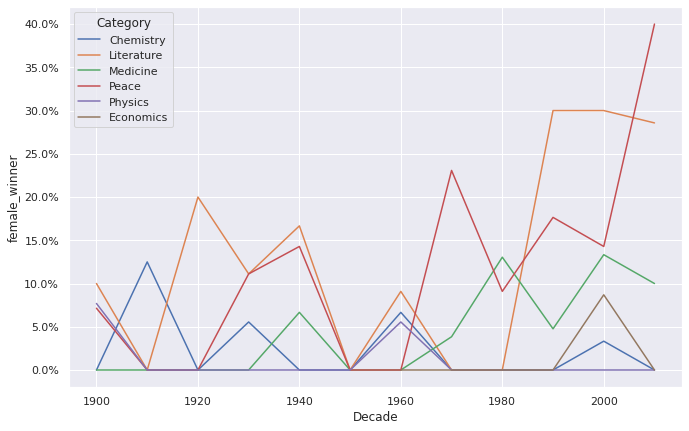

In [ ]:
# Calculating the proportion of female laureates per decade
nobel_df['female_winner'] = nobel_df['Sex']=='Female'
prop_female_winners = nobel_df.groupby(['Decade', 'Category'], as_index=False)['female_winner'].mean()

# Plotting female winners 
ax = sns.lineplot(x='Decade', y='female_winner', hue='Category', data=prop_female_winners)

ax.yaxis.set_major_formatter(PercentFormatter(1.0))

In [ ]:
each_year_female = each_year_gender[(each_year_gender['gender'] == 'female') & (each_year_gender['number of winner'] >= 1 )]

### The first woman to win the Nobel Prize

In [ ]:
# Picking out the first woman to win a Nobel Prize
nobel_df[nobel_df['Sex']=='Female'].nsmallest(1, 'Year')

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,...,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country,USA born winner,Decade,female_winner,age
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True,36.0


<p><img style="float: right;margin:5px 20px 5px 1px; max-width:250px" src="https://raw.githubusercontent.com/Bayan2019/Big_Data_Landscape/main/Marie_Curie.png"></p>

## Repeat laureates
<p>For most scientists/writers/activists a Nobel Prize would be the crowning achievement of a long career. But for some people, one is just not enough, and few have gotten it more than once. Who are these lucky few? (Having won no Nobel Prize myself, I'll assume it's just about luck.)</p>

In [ ]:
# Selecting the laureates that have received 2 or more prizes.
nobel_df.groupby(by='Full Name').filter(lambda x: len(x) > 1)

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,...,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country,USA born winner,Decade,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True
46,1908,Medicine,The Nobel Prize in Physiology or Medicine 1908,"""in recognition of their work on immunity""",1/2,302,Individual,Paul Ehrlich,1854-03-14,Strehlen (Strzelin),...,Male,Goettingen University,Göttingen,Germany,1915-08-20,Bad Homburg vor der Höhe,Germany,False,1900,False
47,1908,Medicine,The Nobel Prize in Physiology or Medicine 1908,"""in recognition of their work on immunity""",1/2,302,Individual,Paul Ehrlich,1854-03-14,Strehlen (Strzelin),...,Male,Königliches Institut für experimentelle Therap...,Frankfurt-on-the-Main,Germany,1915-08-20,Bad Homburg vor der Höhe,Germany,False,1900,False
63,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,Sorbonne University,Paris,France,1934-07-04,Sallanches,France,False,1910,True
90,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1910,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
942,2014,Physics,The Nobel Prize in Physics 2014,"""for the invention of efficient blue light-emi...",1/3,906,Individual,Isamu Akasaki,1929-01-30,Chiran,...,Male,Nagoya University,Nagoya,Japan,NaN,NaN,NaN,False,2010,False
945,2015,Chemistry,The Nobel Prize in Chemistry 2015,"""for mechanistic studies of DNA repair""",1/3,921,Individual,Tomas Lindahl,1938-01-28,Stockholm,...,Male,Francis Crick Institute,Hertfordshire,United Kingdom,NaN,NaN,NaN,False,2010,False
946,2015,Chemistry,The Nobel Prize in Chemistry 2015,"""for mechanistic studies of DNA repair""",1/3,921,Individual,Tomas Lindahl,1938-01-28,Stockholm,...,Male,Clare Hall Laboratory,Hertfordshire,United Kingdom,NaN,NaN,NaN,False,2010,False
947,2015,Chemistry,The Nobel Prize in Chemistry 2015,"""for mechanistic studies of DNA repair""",1/3,922,Individual,Paul Modrich,1946-06-13,"Raton, NM",...,Male,Howard Hughes Medical Institute,"Durham, NC",United States of America,NaN,NaN,NaN,True,2010,False


## How old are you when you get the prize?

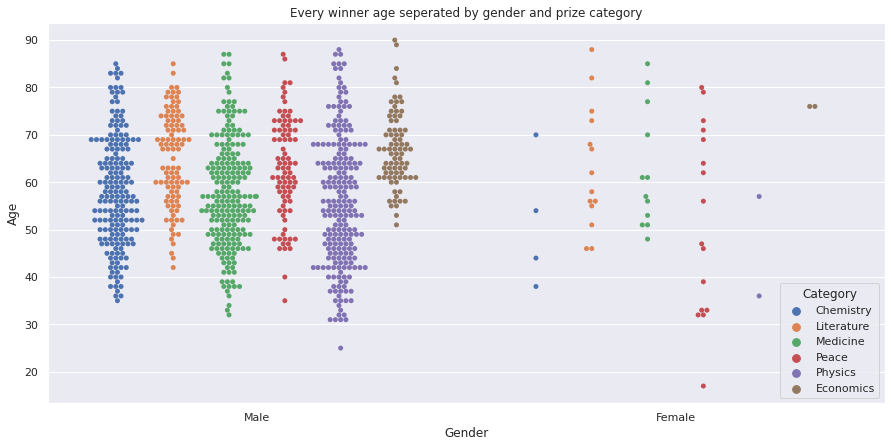

In [ ]:
# Converting birth_date from String to datetime
nobel_df['Birth Date'] = pd.to_datetime(nobel_df['Birth Date'], errors='coerce')

# Calculating the age of Nobel Prize winners
nobel_df['age'] = nobel_df['Year'] - nobel_df['Birth Date'].dt.year

plt.figure(figsize=(15, 7))
sns.swarmplot(x='Sex', y='age',hue = 'Category', dodge=True , data=nobel_df)
plt.ylabel('Age')
plt.xlabel('Gender')
plt.title('Every winner age seperated by gender and prize category')
plt.show()

In [ ]:
print(type(nobel_df['Birth Date'][1]))

<class 'str'>


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



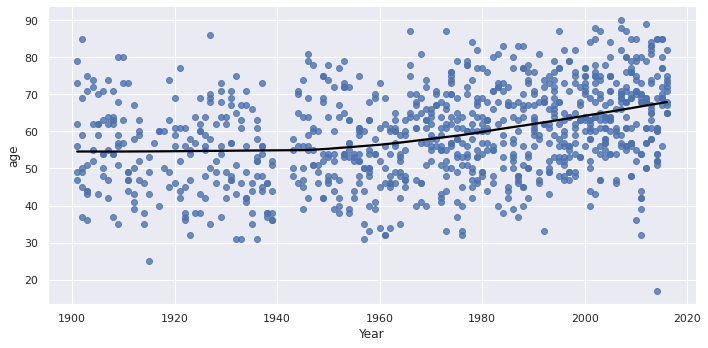

In [ ]:
# Converting birth_date from String to datetime
nobel_df['Birth Date'] = pd.to_datetime(nobel_df['Birth Date'], errors='coerce')

# Calculating the age of Nobel Prize winners
nobel_df['age'] = nobel_df['Year'] - nobel_df['Birth Date'].dt.year

# Plotting the age of Nobel Prize winners
sns.lmplot(x='Year', y='age', data=nobel_df, 
           lowess=True, aspect=2, line_kws={'color': 'black'})

Let's look at age trends within different prize categories.

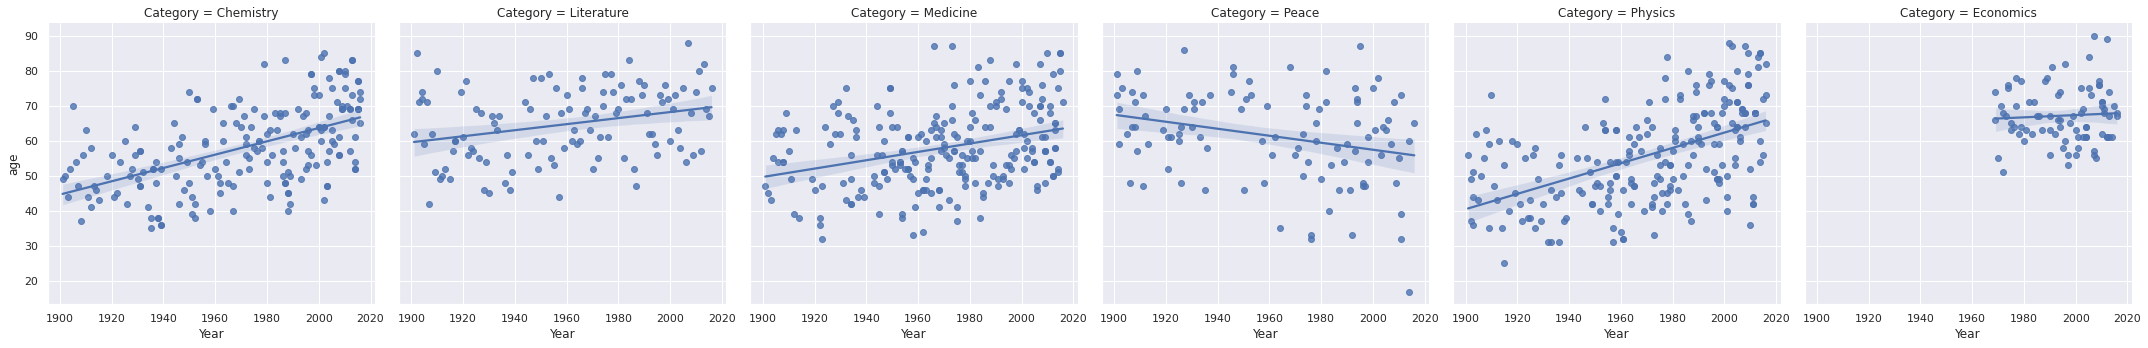

In [ ]:
# Same plot as above, but separate plots for each type of Nobel Prize
sns.lmplot(x='Year', y='age', col='Category', data=nobel_df)

### Oldest and youngest winners
In the peace category we also a winner around 2010 that seems exceptionally young. This begs the questions, who are the oldest and youngest people ever to have won a Nobel Prize?

In [ ]:
# The oldest winner of a Nobel Prize as of 2016
display(nobel_df.nlargest(1, 'age'))

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,...,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country,USA born winner,Decade,female_winner,age
825,2007,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having laid the foundations of mechanism ...",1/3,820,Individual,Leonid Hurwicz,1917-08-21,Moscow,...,University of Minnesota,"Minneapolis, MN",United States of America,2008-06-24,"Minneapolis, MN",United States of America,False,2000,False,90.0


<p><img style="float: right;margin:5px 20px 5px 1px; max-width:250px" src="https://raw.githubusercontent.com/Bayan2019/Big_Data_Landscape/main/Leonid_Hurwicz_NobelPrize.jpeg"></p>

In [ ]:
# The youngest winner of a Nobel Prize as of 2016
nobel_df.nsmallest(1, 'age')

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,...,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country,USA born winner,Decade,female_winner,age
940,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,914,Individual,Malala Yousafzai,1997-07-12,Mingora,...,NaN,NaN,NaN,NaN,NaN,NaN,False,2010,True,17.0


<p><img style="float: right;margin:5px 20px 5px 1px; max-width:250px" src="https://raw.githubusercontent.com/Bayan2019/Big_Data_Landscape/main/Malala_Yousafzai_NOBEL_PEACE.jpeg"></p>